<a href="https://colab.research.google.com/github/shnehapaudyal/unsupervisedLearning/blob/main/UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment

In [ ]:
# Reinstall scikit-learn to upgrade to version 1.3.2
# !pip uninstall scikit-learn -y
# !pip install -U scikit-learn

In [ ]:
from google.colab import drive
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, OPTICS, Birch, HDBSCAN, AgglomerativeClustering, SpectralClustering

In [ ]:
drive.mount('/content/drive')

dataset=np.load('/content/drive/MyDrive/DM/data.npy')
drive.flush_and_unmount()

Mounted at /content/drive


## Setup

In [ ]:
[dataset[0], dataset.shape]

[array([0.84219027, 0.03995678]), (400, 2)]

In [ ]:
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 20, 'linewidths':3}

NameError: name 'sns' is not defined

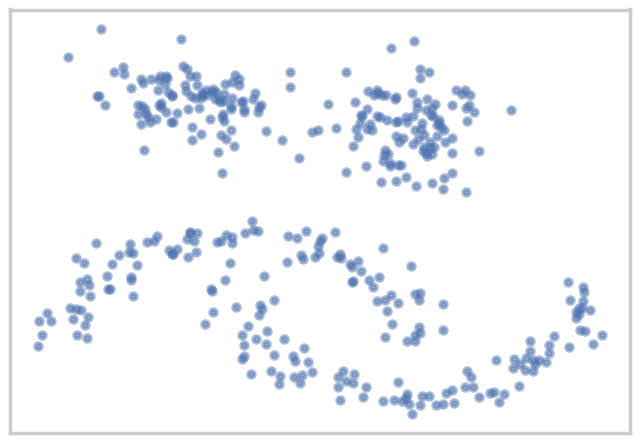

In [ ]:
def plot_scatter():
  plt.scatter(dataset.T[0], dataset.T[1], c='b', **plot_kwds)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plot_scatter()

In [ ]:
def plot_clusters (data, algorithm, args, kwds):
  start_time = time.time()
  labels = algorithm(*args, **kwds).fit_predict(data)
  end_time = time.time()
  palette = sns.color_palette('deep', np.unique(labels).max() + 1)
  colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
  plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format((end_time - start_time)*1000), fontsize=14)

In [ ]:
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

def silhouette_scorer(model, X):
  return metrics.silhouette_score(X, model.fit_predict(X))

def gridSearch(model, param_grid, data):
  search = GridSearchCV(model, param_grid=param_grid, scoring=silhouette_scorer, cv=[(slice(None), slice(None))])
  search.fit(data)
  return search

In [ ]:
def visualize(modefrom sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScalerl, clusters, metric='distortion'):
  visualizer = KElbowVisualizer(model, k=clusters, metric=metric, timings= True)
  visualizer.fit(dataset)
  visualizer.show()

In [ ]:
c = cluster

## KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

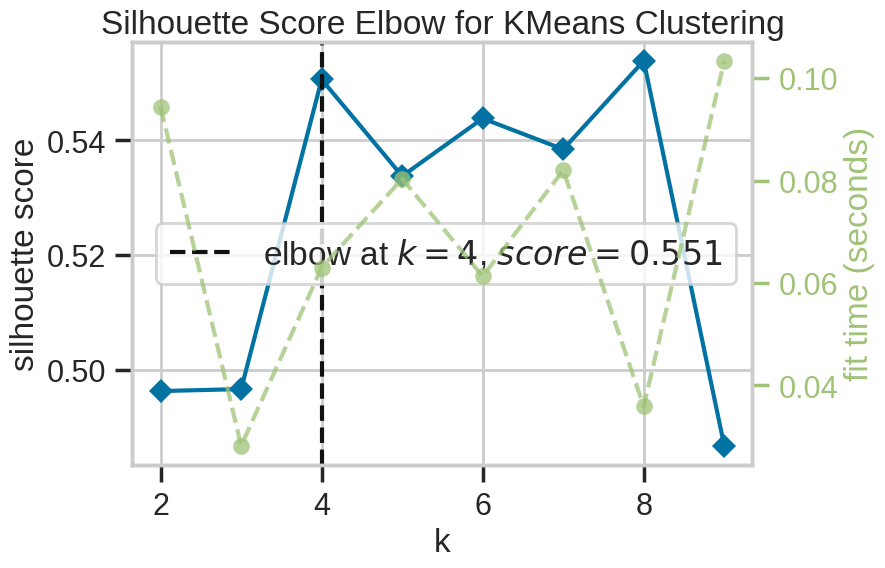

In [ ]:
visualize(KMeans(), (2, 10), 'silhouette')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

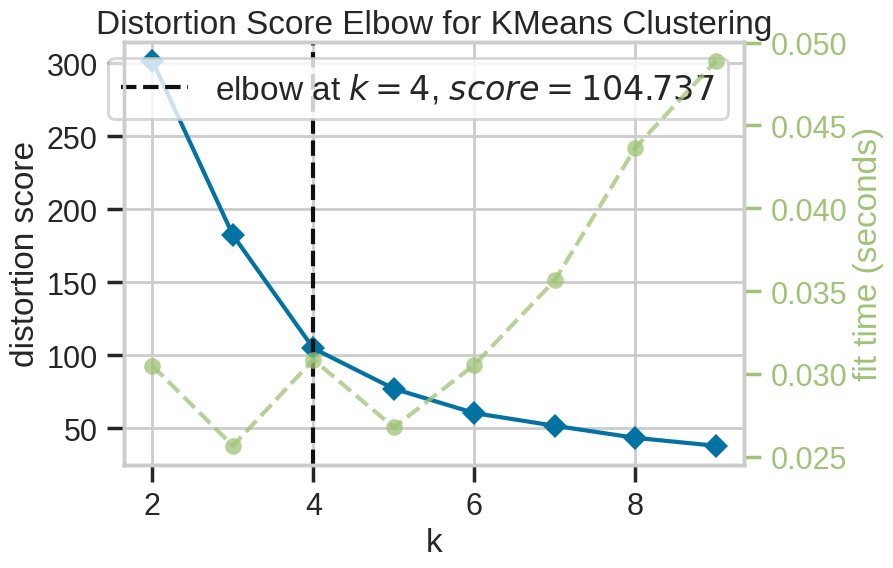

In [ ]:
visualize(KMeans(), (2,10))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


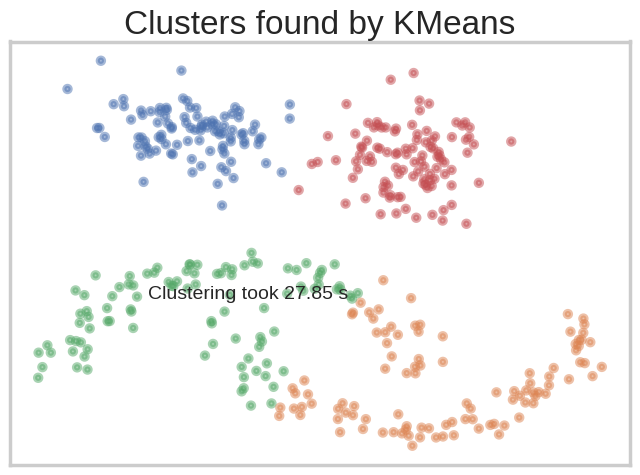

In [ ]:
# Using Elbow method to determine number of clusters. There are other methods as well but choosing this one because of the simplicity.
# Elbow method returned 4 while using both WCSS and SS.
# https://www.researchgate.net/profile/Trupti-Kodinariya/publication/313554124_Review_on_Determining_of_Cluster_in_K-means_Clustering/links/5789fda408ae59aa667931d2/Review-on-Determining-of-Cluster-in-K-means-Clustering.pdf
plot_clusters(dataset, KMeans, (), {'n_clusters': 4})

## DBSCAN

[0.00379583 0.00379583 0.00928347 0.00928347 0.01017936 0.01017936
 0.01148302 0.01148302 0.01187848 0.01187848 0.01309626 0.01309626
 0.0131338  0.0131338  0.01522981 0.01522981 0.0153016  0.0153016
 0.01548301 0.01548301 0.01645827 0.01645827 0.01681765 0.01681765
 0.01683347 0.01683347 0.0168531  0.0168531  0.01694672 0.01694672
 0.01770502 0.01770502 0.01870407 0.01870407 0.01940349 0.01940349
 0.01956055 0.01956055 0.01975848 0.01975848 0.02004973 0.02004973
 0.02089157 0.02089157 0.02105165 0.02105165 0.02128133 0.02128133
 0.02184131 0.02184131 0.02275517 0.02275517 0.02283557 0.02283557
 0.02303266 0.02303266 0.02325646 0.02325646 0.02362935 0.02362935
 0.02375348 0.02375348 0.02478319 0.02478319 0.02498136 0.02498136
 0.02665029 0.02671778 0.02671778 0.02683186 0.02683186 0.02747939
 0.02747939 0.02883418 0.02916911 0.02916911 0.02918394 0.02918394
 0.02921827 0.02921827 0.02928274 0.02928274 0.02937275 0.02937275
 0.02982164 0.02993652 0.02993652 0.03015072 0.03022018 0.03041

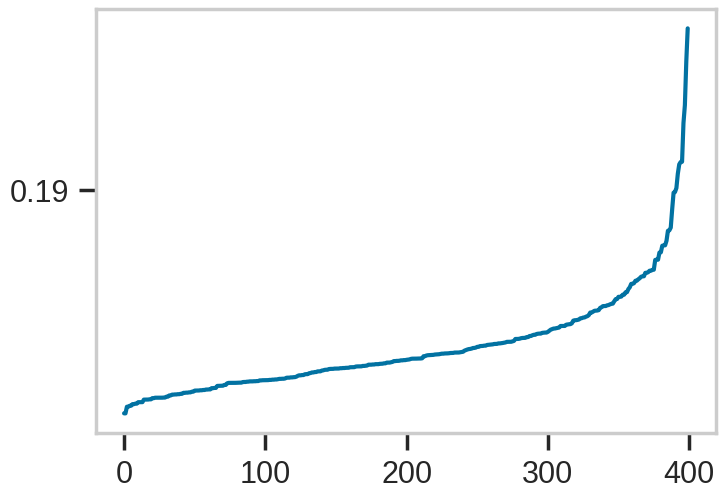

In [ ]:
# https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf
# Compute nearest neighbors to estimate the value of dbscan
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dataset)
distances, indices = neighbors_fit.kneighbors(dataset)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
print(distances)
plt.grid()
tcks = [tck / 100 for tck in [19]]
plt.yticks(tcks)
plt.plot(distances)

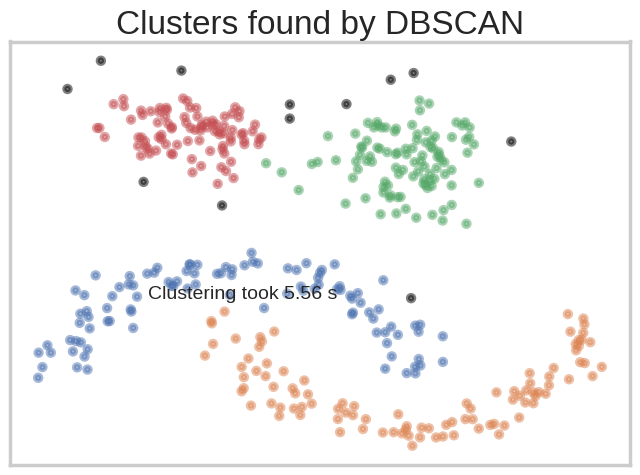

In [ ]:
# https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
#
# Use min_samples = 4 (Ester et al., 1996). Basically choose 4 for 2D data
# https://cdn.aaai.org/KDD/1996/KDD96-037.pdf
#
# Use eps = obtained 0.13 from the test above, but obtained tiny clusters.
# Experimenting with different values, obtained good clusters at 0.193
#
# Obtained from calculating the most critical change between the points of dataset
# https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf
plot_clusters(dataset, DBSCAN, (), {'min_samples': 4, 'eps': 0.193})

In [ ]:
dbscanArgs = gridSearch(DBSCAN(min_samples=4), {'eps': np.arange(0.1, 0.3, 0.02)}, dataset)
dbscanArgs.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
  File "<ipython-input-9-90f2b8659590>", line 5, in silhouette_scorer
    return metrics.silhouette_score(X, model.fit_predict(X))
NameError: name 'metrics' is not defined

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
  File "<ipython-input-9-90f2b8659590>

{'eps': 0.1}

## Affinity Propagation

In [ ]:
from sklearn.metrics import pairwise_distances
affinities = pairwise_distances(dataset, metric='euclidean')
affinities, np.median(affinities)

(array([[0.        , 0.540826  , 1.43172544, ..., 2.18817032, 1.94402115,
         2.06517279],
        [0.540826  , 0.        , 1.57497483, ..., 2.69658018, 2.4094176 ,
         2.54463647],
        [1.43172544, 1.57497483, 0.        , ..., 1.98985752, 1.51048525,
         1.68563306],
        ...,
        [2.18817032, 2.69658018, 1.98985752, ..., 0.        , 0.50304928,
         0.34247345],
        [1.94402115, 2.4094176 , 1.51048525, ..., 0.50304928, 0.        ,
         0.17517982],
        [2.06517279, 2.54463647, 1.68563306, ..., 0.34247345, 0.17517982,
         0.        ]]),
 1.5848592482740151)

In [ ]:
# Use sillhouette score to find best params for AffinityPropagation
# Need to justify the range used to find the params though
# This is source for Affinity Propagation
# https://utstat.toronto.edu/reid/sta414/frey-affinity.pdf

# import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import numpy as np

# Initialize with default parameters
ap = AffinityPropagation()

# Fit the model to the data
ap.fit(dataset)

# Explore different damping and preference values
damping_params = [x / 10 for x in range(5, 10)]
preference_params = [x for x in range(-65, -35, 5)]

best_silhouette = -1
best_damping = None
best_preference = None
best_cluster_labels = None

for damping in damping_params:
    for preference in preference_params:
        model = AffinityPropagation(damping=damping, preference=preference)
        cluster_labels = model.fit_predict(dataset)

        if len(set(cluster_labels)) <= 1 or len(set(cluster_labels)) >= len(dataset):
          continue

        silhouette = metrics.silhouette_score(dataset, cluster_labels)

        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_damping = damping
            best_preference = preference

{ 'damping': best_damping, 'preference': best_preference}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Af

{'damping': 0.7, 'preference': -55}

In [ ]:
gs = gridSearch(AffinityPropagation(), {'damping': np.arange(0.5, 1, 0.1), 'preference': np.arange(-65, -40, 5)}, dataset)
gs.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Af

{'damping': 0.7, 'preference': -55}

In [ ]:
# Checking if higher damping score causes oscillations
from numpy.random.mtrand import RandomState
scores = []
for i in range(0, 100):
  labels = AffinityPropagation(damping=0.9, preference=-55, random_state=RandomState(i)).fit_predict(dataset)
  ss = metrics.silhouette_score(dataset, labels)
  scores.append(ss)
print(set(scores))

{0.5500750764681438}


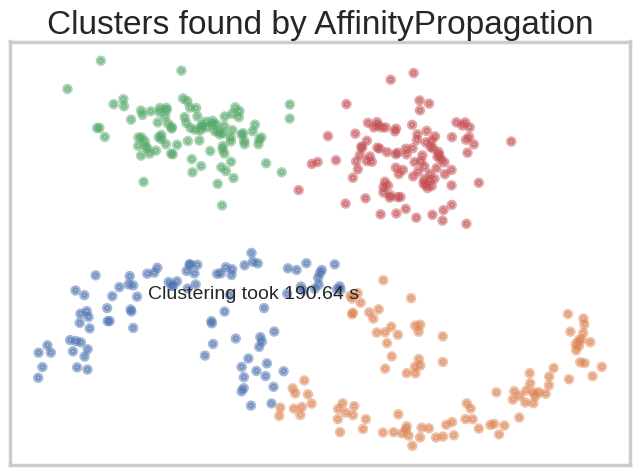

In [ ]:
# plot_clusters(dataset, AffinityPropagation, (), {'damping': 0.7, 'preference': -8})
plot_clusters(dataset, AffinityPropagation, (), {'damping': 0.9, 'preference': -55})


## Birch

In [ ]:
# High branching factor is required to be able to use Flat tree, so that

# But keep in mind, high branching factor will required higher computational resource which can be a drawback
# We can use high branching factor here since the number of clusters are not that many
# Using DBScan to identify number of clusters, then use that information to calculate branching factor
# https://www.sciencedirect.com/science/article/pii/S2214579617300151

# We choose n_clusters to be None to prevent the final cluster aggregation step to improve performance

# Using our preconfigured dbscan model to count number of clusters
dbscan = DBSCAN(eps=0.14, min_samples=4)
dbscan.fit(dataset)
dbFeatures = dbscan.labels_

# Removing noise as a cluster
branching_factor = len(set(filter(lambda x: x > -1, dbFeatures)))

branching_factor

8

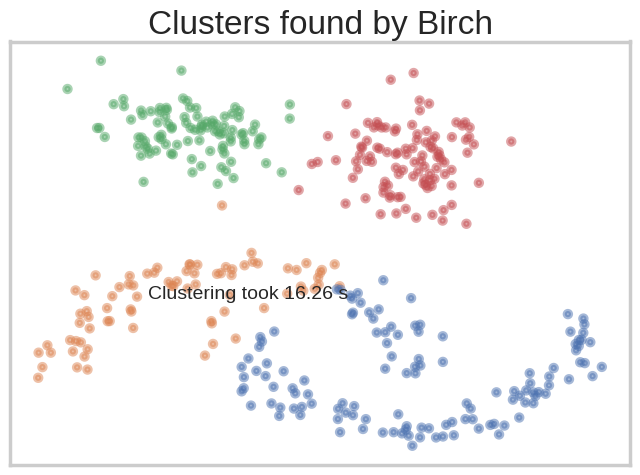

In [ ]:
plot_clusters(dataset, Birch, (), {'n_clusters': None, 'branching_factor': 8, 'threshold':1})
# plot_clusters(dataset, Birch, (), {'n_clusters': 4})

## Optics

In [ ]:
# https://datarundown.com/optics-clustering/
# Use reachability to observe the performance of parameters
# https://dl.acm.org/doi/pdf/10.1145/304181.304187


In [ ]:
optics = OPTICS(min_cluster_size=0.05, xi=0.02)
optics.fit(dataset)

OPTICS(min_cluster_size=0.05, xi=0.02)

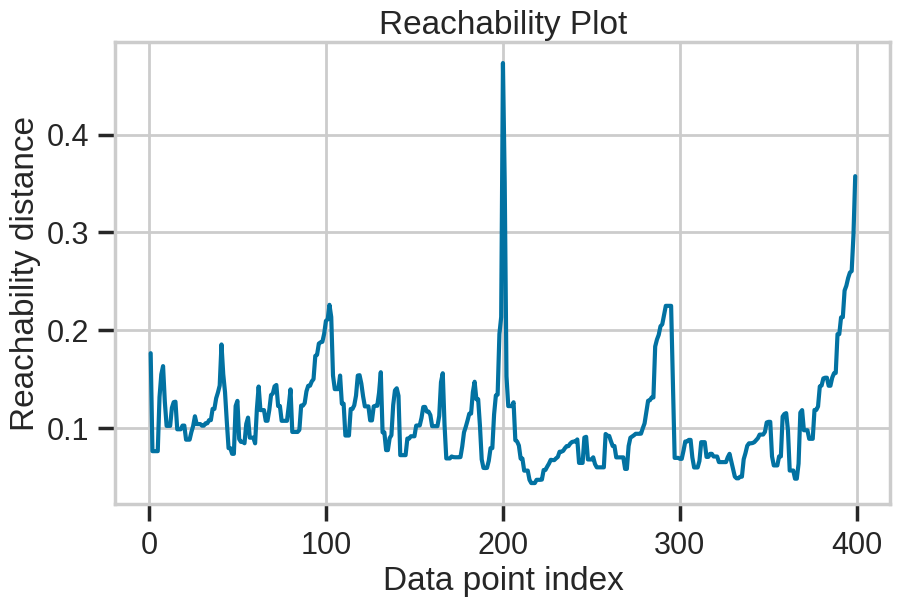

In [ ]:
plt.figure(figsize=(10, 6))
reachability = optics.reachability_[optics.ordering_]
plt.plot(reachability)
plt.xlabel("Data point index")
plt.ylabel("Reachability distance")
plt.title("Reachability Plot")
plt.show()


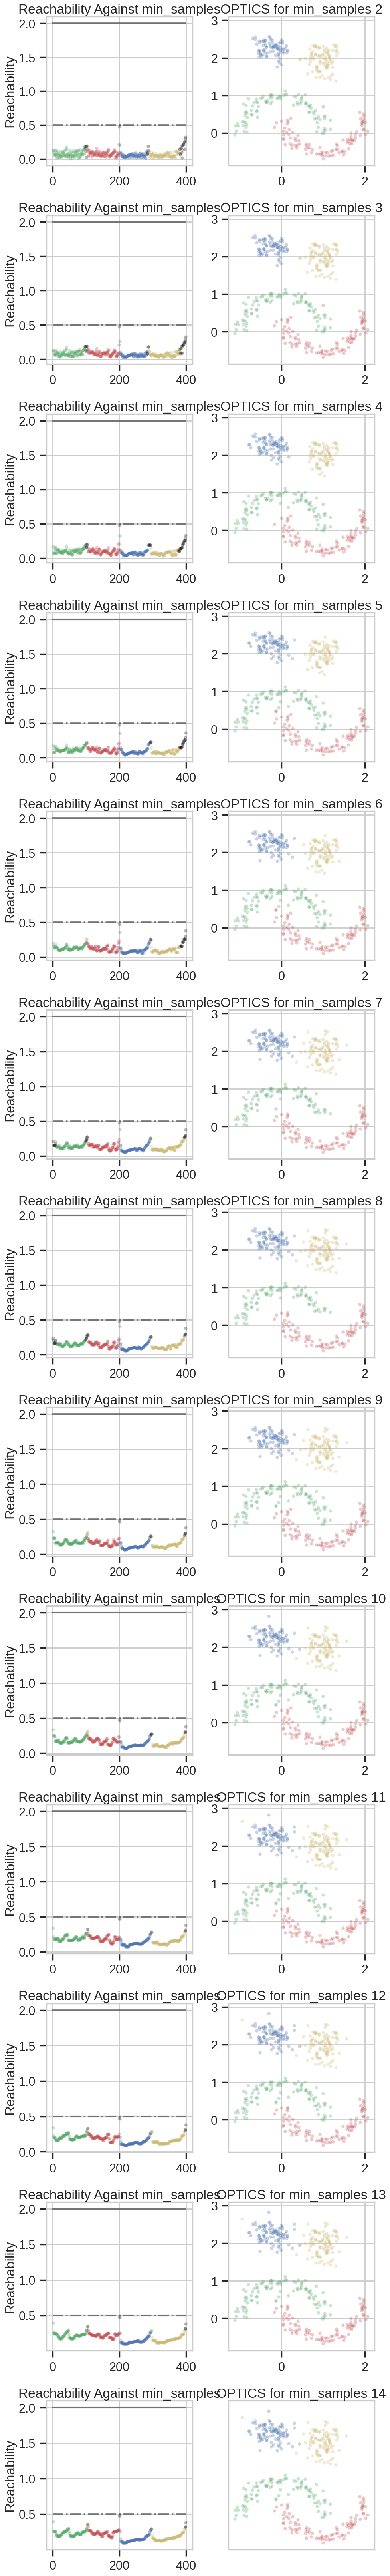

In [ ]:
import matplotlib.gridspec as gridspec

from sklearn.cluster import OPTICS, cluster_optics_dbscan

args = [{'min_samples': x, 'xi': 0.02, 'min_cluster_size': 0.2} for x in range(2, 15)]

ds = dataset.copy()

spaces = np.arange(len(ds))

plt.figure(figsize=(10, 5 * len(args)))
grd = gridspec.GridSpec(len(args), 2)

def opticsPlot(row, kwargs):
  optics = OPTICS(**kwargs)
  optics.fit(ds)

  reachability = optics.reachability_[optics.ordering_]
  labels = optics.labels_[optics.ordering_]

  ax1 = plt.subplot(grd[row, 0])
  ax2 = plt.subplot(grd[row, 1])

  colors = ["g.", "r.", "b.", "y.", "c."]
  for lbl, color in zip(range(0, 5), colors):
      dsK = spaces[labels == lbl]
      Rk = reachability[labels == lbl]
      ax1.plot(dsK, Rk, color, alpha=0.3)
  ax1.plot(spaces[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
  ax1.plot(spaces, np.full_like(spaces, 2.0, dtype=float), "k-", alpha=0.5)
  ax1.plot(spaces, np.full_like(spaces, 0.5, dtype=float), "k-.", alpha=0.5)
  ax1.set_ylabel("Reachability")
  ax1.set_title("Reachability Against min_samples")

  # OPTICS
  colors = ["g.", "r.", "b.", "y.", "c."]
  for klass, color in zip(range(0, 5), colors):
      dsK = ds[optics.labels_ == klass]
      ax2.plot(dsK[:, 0], dsK[:, 1], color, alpha=0.3)
  ax2.plot(ds[optics.labels_ == -1, 0], ds[optics.labels_ == -1, 1], "k+", alpha=0.1)
  ax2.set_title("OPTICS for min_samples {}".format(optics.min_samples))

for i, kwarg in enumerate(args):
  opticsPlot(i, kwarg)

plt.tight_layout()

frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

plt.show()



In [ ]:
# https://www.dbs.ifi.lmu.de/Publikationen/Papers/OPTICS.pdf
#
# Choosing a relatively smaller xi since there are few cases where density is sparser
# Min_samples will help to define the total number of clusters. We do not want a
# large number of clusters.
# Similary, the coresponding min_cluster_size will also be less than 0.5 so that we dont get
# small number of large clusters.
# Experimenting with min samples to choose
from sklearn.model_selection import GridSearchCV

param_grid = {
    # 'min_samples': range(10, 20, 1),  # Example range for min_samples
    # 'xi': np.linspace(0.01, 0.05, 5),  # Example range for xi
    # 'min_cluster_size': np.linspace(0.1, 0.9, 10)
}

optics_grid = GridSearchCV(OPTICS(xi=0.02, min_samples= 13, min_cluster_size= 0.2), param_grid, scoring=lambda model, X: silhouette_score(X, model.fit(X).labels_))  # Example scoring metric
optics_grid.fit(dataset)

best_params = optics_grid.best_params_
best_model = optics_grid.best_estimator_

In [ ]:
optics_grid.cv_results_
# all_estimators = optics_grid.cv_results_['estimator']  # List of fitted OPTICS models
# all_reachability = []
# for estimator in all_estimators:
#     reachability = estimator.reachability_[estimator.ordering_]
#     all_reachability.append(reachability)

# # Example: Visualize the reachability plots for all runs
# for i, reachability in enumerate(all_reachability):
#     plt.figure(figsize=(10, 6))
#     plt.plot(reachability)
#     plt.xlabel("Data point index")
#     plt.ylabel("Reachability distance")
#     plt.title(f"Reachability Plot for Run {i+1}")
#     plt.show()


{'mean_fit_time': array([0.2972137]),
 'std_fit_time': array([0.05639607]),
 'mean_score_time': array([0.06468315]),
 'std_score_time': array([0.00821802]),
 'params': [{}],
 'split0_test_score': array([0.26270015]),
 'split1_test_score': array([0.35602865]),
 'split2_test_score': array([0.54372915]),
 'split3_test_score': array([0.31103307]),
 'split4_test_score': array([0.37046665]),
 'mean_test_score': array([0.36879154]),
 'std_test_score': array([0.09524735]),
 'rank_test_score': array([1], dtype=int32)}

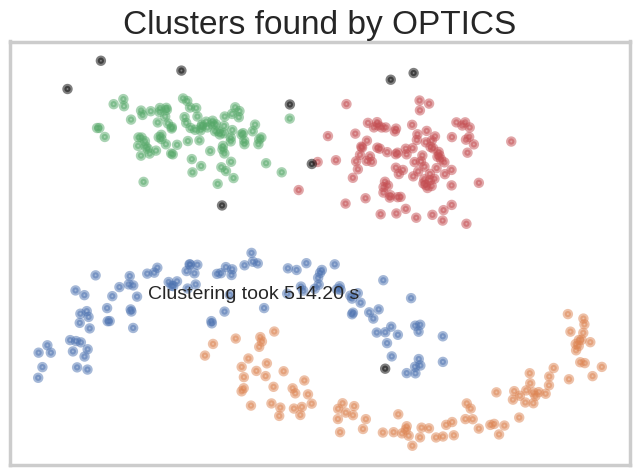

In [ ]:
# Obtained from gridsearch
plot_clusters(dataset, OPTICS, (), {'xi':0.02, 'min_samples': 9, 'min_cluster_size': 0.2})

## HDBSCAN

In [ ]:
# https://repositorio.usp.br/bitstream/handle/BDPI/51005/2709770.pdf?sequence=1
# Similar parameters as OPTICS because both are density based clustering algo
# min_cluster_size defines number of items needed to make up a cluster, we set
# it to be 60 at first based on the initial observation for data plot
#
# min_samples might need to be quite small because we have little cluster size
# vairation. We can set it to 15 and compare if the model works or not.
#
# cluster_selection_epsilon helps to merge tiny clusters into large ones. Since
# our clusters have roughly same size, we can keep it to 0.5 and experiment.

estimator = gridSearch(HDBSCAN(), {
    'min_cluster_size': np.arange(1, 60, 5),
    'min_samples': np.arange(5, 10, 1),
    'cluster_selection_epsilon': np.arange(0.1, 0.2, 0.02)
}, dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 727, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_hdbscan/hdbscan.py", line 696, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

In [ ]:
best_params = estimator.best_params_.copy()
best_params

{'cluster_selection_epsilon': 0.1, 'min_cluster_size': 36, 'min_samples': 6}

{'cluster_selection_epsilon': 0.1, 'min_cluster_size': 36, 'min_samples': 6}

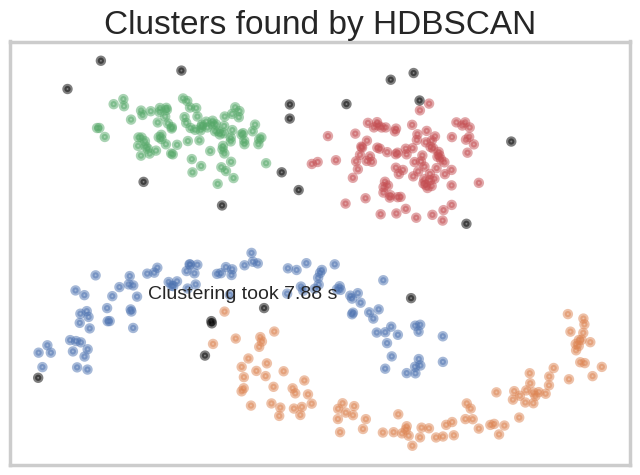

In [ ]:
# best_params['min_cluster_size'] = 5
# best_params['min_samples'] = 8
# best_params['cluster_selection_epsilon'] = 0.12

plot_clusters(dataset, HDBSCAN, (), best_params)
best_params

##Agglomerative Clustering

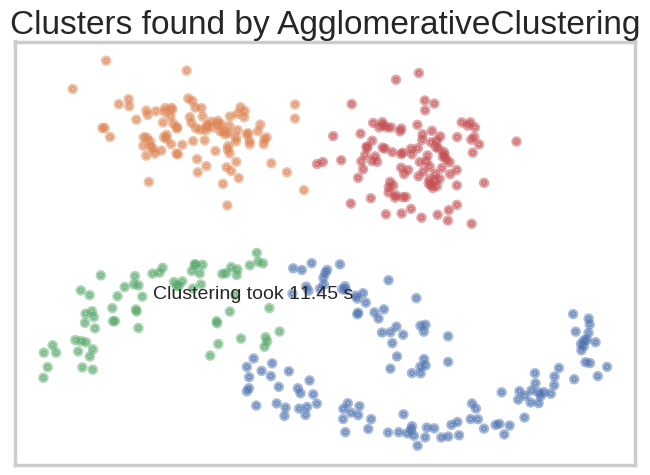

In [ ]:
# Need to look more deep into it.
# Plot a dendogram
# Agglomerative clustering's hierarchical nature allows visualizing the merging process through a dendrogram (Murtagh & Legendre, 2014).
# Analyzing the dendrogram at different levels based on n_clusters helps interpret the data at various granularities.
# Choosing the n_clusters value corresponding to a significant jump in the distance between merges on the dendrogram can be a valuable guide.

# AgglomerativeClustering(distance_threshold=10, metric=)

n_clusters = None
lkg = 'average'
distance_threshold = 1.25
metrics = 'euclidean'

plot_clusters(dataset, AgglomerativeClustering, (), { 'metric': metrics, 'n_clusters': n_clusters, 'distance_threshold': distance_threshold, 'linkage': lkg})

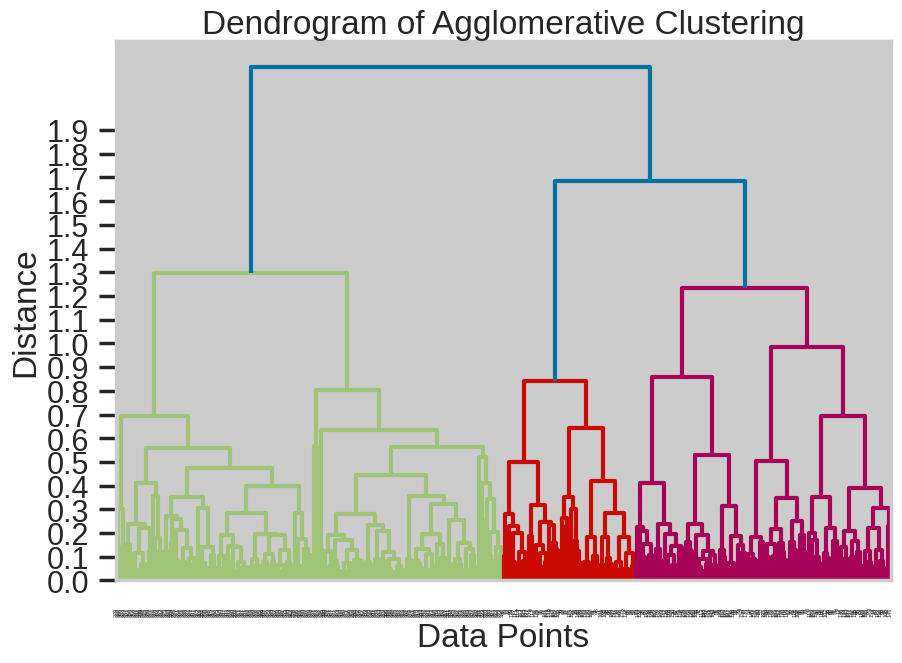

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(dataset, method=lkg)  # Adjust linkage method as needed
plt.figure(figsize=(10, 7))  # Adjust figure size as needed
dendrogram(linkage_matrix, leaf_font_size=4)
plt.title("Dendrogram of Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.yticks(np.arange(0,2,0.1))
plt.show()

##Spectral Clustering

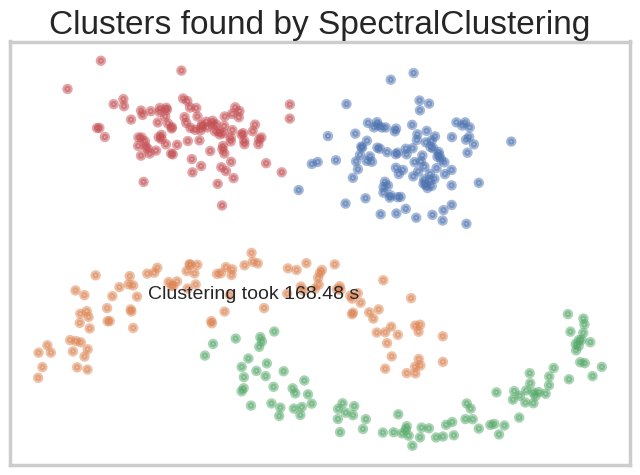

In [ ]:
# Choose high gamma for a narrow kernel. Since the clusters need to support irregular
# clusters, high gamma will help it out.
# Choosing rbf kernel because of irregular clusters.
# Choosing 4 as number of clusters because of the silhouette_score

SpectralClustering()
plot_clusters(dataset, SpectralClustering, (), {'n_clusters': 4, 'gamma': 40})

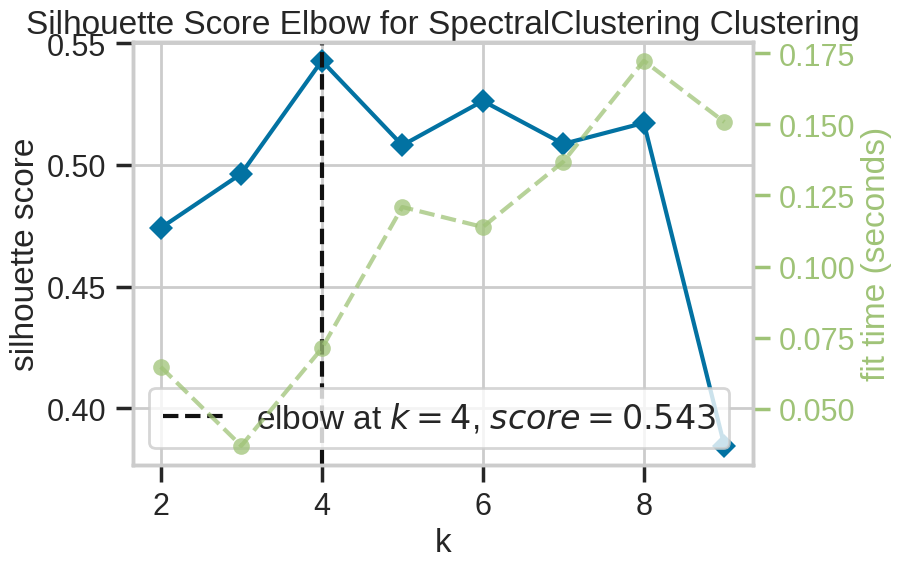

In [ ]:
visualize(SpectralClustering(), (2,10), 'silhouette')

## Result

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def get_score(data, estimator, kwds):
  labels = estimator(**kwds).fit(data).labels_
  return {'ss': silhouette_score(data, labels), 'dbi': davies_bouldin_score(data, labels), 'ch': calinski_harabasz_score(data, labels)}

# def get_davis_boulding(data, estimator, kwds):
#   return davies_bouldin_score(data, estimator(**kwds).fit_predict(data))

scores = {}
scores['SpectralClustering'] = get_score(dataset, SpectralClustering, {'n_clusters': 4, 'gamma': 40})
scores['AgglomerativeClustering'] = get_score(dataset, AgglomerativeClustering, { 'metric': 'euclidean', 'n_clusters': None, 'distance_threshold': 1.25, 'linkage': 'average'})
scores['HDBSCAN'] = get_score(dataset, HDBSCAN, {'cluster_selection_epsilon': 0.1, 'min_cluster_size': 36, 'min_samples': 6})
scores['OPTICS'] = get_score(dataset, OPTICS, {'xi':0.02, 'min_samples': 8, 'min_cluster_size': 0.2})
scores['Birch'] = get_score(dataset, Birch, {'n_clusters': None, 'branching_factor': 8, 'threshold':1})
scores['AffinityPropagation'] = get_score(dataset, AffinityPropagation, {'damping': 0.9, 'preference': -55})
scores['DBSCAN'] = get_score(dataset, DBSCAN, {'min_samples': 4, 'eps': 0.193})
scores['KMeans'] = get_score(dataset, KMeans, {'n_clusters': 4})

scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'SpectralClustering': {'ss': 0.4834046283146072,
  'dbi': 0.842941883594791,
  'ch': 491.65358599087375},
 'AgglomerativeClustering': {'ss': 0.5374566269708282,
  'dbi': 0.6299135591624785,
  'ch': 621.4429948200535},
 'HDBSCAN': {'ss': 0.43849878583005775,
  'dbi': 1.684961940513333,
  'ch': 307.0134942914231},
 'OPTICS': {'ss': 0.4570392211597998,
  'dbi': 2.0301469322731602,
  'ch': 308.60351618399676},
 'Birch': {'ss': 0.5430264163510435,
  'dbi': 0.6403865004141978,
  'ch': 641.850056544443},
 'AffinityPropagation': {'ss': 0.5500750764681438,
  'dbi': 0.6409167990577573,
  'ch': 694.9200438557351},
 'DBSCAN': {'ss': 0.43083934884673086,
  'dbi': 1.6455897540044062,
  'ch': 333.7774800129294},
 'KMeans': {'ss': 0.5505962600226745,
  'dbi': 0.642350701241963,
  'ch': 696.6179800044396}}